In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [ ]:
import pandas as pd

file_path = 'apple.csv'

data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the data into training and testing sets
training_data = data[data['Date'] < '2024-01-01']
testing_data = data[data['Date'] >= '2024-01-01']

# Save the datasets to separate CSV files
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the training dataset
dataset_train = pd.read_csv('training_data.csv')

# Clean and Convert Data
dataset_train['Close/Last'] = dataset_train['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Extract the 'Close/Last' column for training
training_set = dataset_train.iloc[:, 1:2].values

# Apply MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Adjust the loop range based on the size of training_set_scaled
X_train = []
y_train = []

# Ensure the loop range is correct based on the size of training_set_scaled
for i in range(5, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-5:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1139, 5, 1)
y_train shape: (1139,)


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout_8 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_9 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_9 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 50)             20200     
                                                                 
 dropout_10 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 31s 13ms/step - loss: 0.1311
Epoch 2/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0201
Epoch 3/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0072
Epoch 4/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 5/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0054
Epoch 6/100
36/36 [==============================] - 0s 14ms/step - loss: 0.0047
Epoch 7/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 8/100
36/36 [==============================] - 0s 14ms/step - loss: 0.0042
Epoch 9/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0045
Epoch 10/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 11/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 12/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0043
Epoch 13/100
36/36 [====

In [ ]:
model.save('apple_stock.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the testing dataset
dataset_test = pd.read_csv('testing_data.csv')

# Clean and Convert Data (similar to what you did for training data)
dataset_test['Close/Last'] = dataset_test['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Extract the 'Close/Last' column for testing
testing_set = dataset_test.iloc[:, 1:2].values

# Apply the same MinMaxScaler as used for training data
sc = MinMaxScaler(feature_range=(0, 1))
testing_set_scaled = sc.fit_transform(testing_set)

# Prepare X_test similar to X_train (using 60 time steps for each prediction)
sequence_length = 5  # Assuming you used a sequence length of 60 for training

X_test = []
y_test = []

# Create sequences for testing similar to how you did for training
for i in range(sequence_length, len(testing_set_scaled)):
    X_test.append(testing_set_scaled[i-sequence_length:i, 0])
    y_test.append(testing_set_scaled[i, 0])

# Convert lists to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape X_test to match the LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (110, 5, 1)
y_test shape: (110,)


4/4 [==============================] - 2s 6ms/step


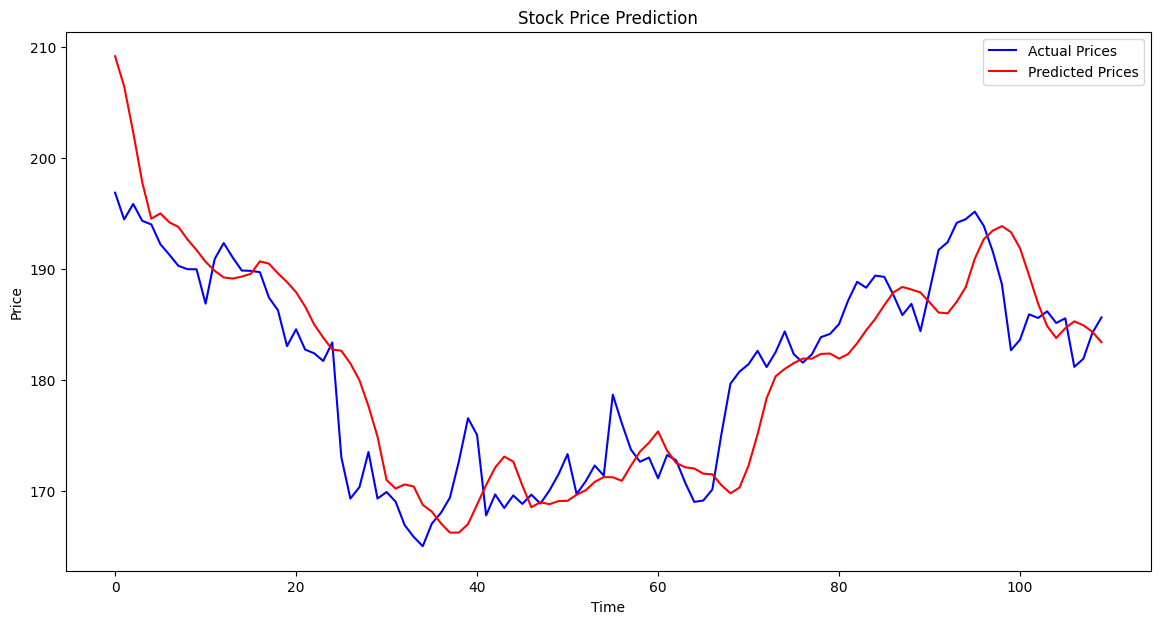

In [ ]:
# Assuming 'regressor' is your trained LSTM model
predicted_prices = regressor.predict(X_test)

# Inverse transform the predictions to get original scale
predicted_prices = sc.inverse_transform(predicted_prices)

# Inverse transform y_test to get original scale for actual prices
y_test_original = sc.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_original, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()